In [1]:
import numpy  as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
train  =  pd.read_csv(r"C:\Users\CHAITANYA\Pictures\gekpro\train.csv")
test   = pd.read_csv(r"C:\Users\CHAITANYA\Pictures\gekpro\test.csv\test.csv")

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(42000, 785)

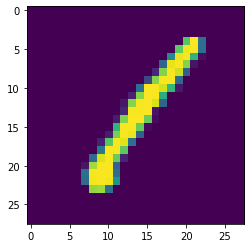

In [13]:
import matplotlib.pyplot as plt
num = np.array(train.iloc[0,1:]).reshape(28,28) 
# check matrix [1,1:]=> 1 =012345678.. , 1=label
plt.imshow(num)
plt.show()

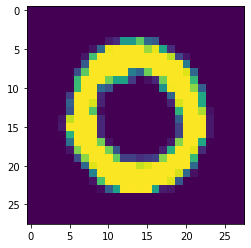

In [14]:
import matplotlib.pyplot as plt
num = np.array(train.iloc[1,1:]).reshape(28,28) 
plt.imshow(num)
plt.show()

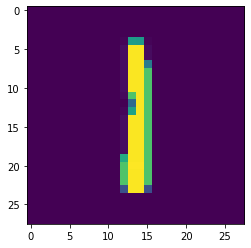

In [15]:
import matplotlib.pyplot as plt
num = np.array(train.iloc[2,1:]).reshape(28,28) 
plt.imshow(num)
plt.show()

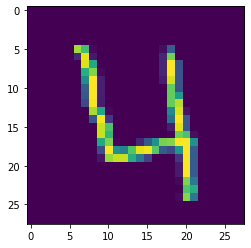

In [16]:
import matplotlib.pyplot as plt
num = np.array(train.iloc[3,1:]).reshape(28,28) 
plt.imshow(num)
plt.show()

In [49]:
number = np.array(train.iloc[0,1:]).reshape(28,28)
number[10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  93, 254, 253, 238, 170,  17,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=int64)

In [50]:
import matplotlib.pyplot as plt

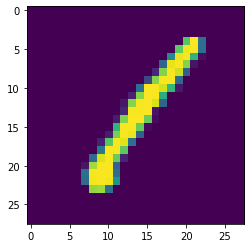

In [51]:
plt.imshow(number)

In [52]:
number4 = np.array(train.iloc[3,1:]).reshape(28,28)

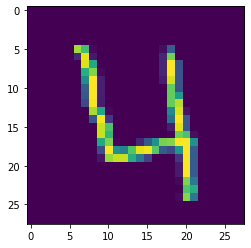

In [53]:
plt.imshow(number4)

In [54]:
arr = train.iloc[3,1:]

(array([691.,   7.,  18.,   4.,   5.,   5.,   7.,  12.,   9.,  26.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

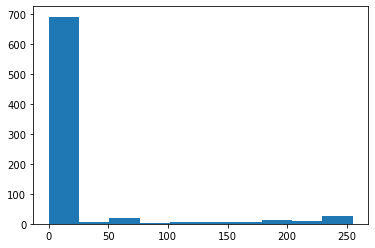

In [55]:
plt.hist(arr)


In [56]:
max(arr)


255

In [57]:
min(arr)

0

In [58]:
np.mean(arr)

19.164540816326532

## Missing Values


In [59]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [60]:
x = np.array(train)
y = np.array(test)

In [61]:
X_train = x[:,1:]
Y_train = x[:,0]
X_test = y

## Feature Engineering

In [62]:
from keras.preprocessing.image import ImageDataGenerator
X_train = X_train.reshape(-1,28,28,1)
# primary goal => to change shape = (42000,784) -> (42000,28,28,1)

In [63]:
datagen = ImageDataGenerator(
    rotation_range = 15,      # HOW MUCH I WANT TO ROTATE
    height_shift_range = 0.1, 
    zoom_range  = 0.1,
    shear_range = 0.1,        # |_| TO /_| 4 SIDES CLOSED
    )
datagen.fit(X_train)

In [64]:
X_train = X_train.reshape(-1,784)
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Model

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [67]:
int(knn.predict(X_test[60].reshape(1,-1)))

4

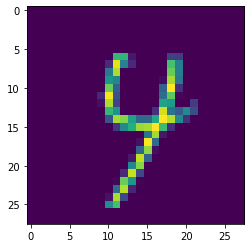

In [68]:
num = np.array(test.iloc[60,:]).reshape(28,28)
plt.imshow(num)

In [69]:
int(knn.predict(X_test[50].reshape(1,-1)))

6

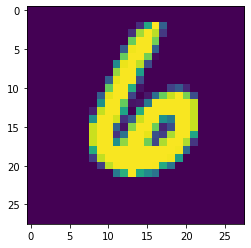

In [70]:
num = np.array(test.iloc[50,:]).reshape(28,28)
plt.imshow(num)

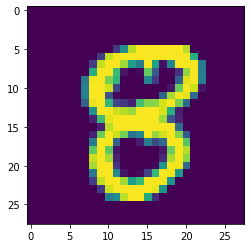

In [71]:
num = np.array(test.iloc[51,:]).reshape(28,28)
plt.imshow(num)

In [72]:
int(knn.predict(X_test[51].reshape(1,-1)))

8

In [73]:
int(knn.predict(X_test[4].reshape(1,-1)))

3

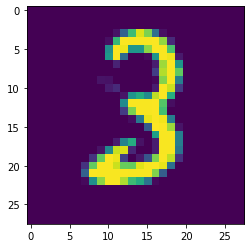

In [74]:
num = np.array(test.iloc[4,:]).reshape(28,28)
plt.imshow(num)